# **Preprocessings & Analysis**


##1.   Introduction
  	
##2.   Handling Data





## Imports 

In [1]:
import datetime
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

In [3]:
sentiment_politic = pd.read_csv("./drive/MyDrive/data/final_labelled.csv")
del sentiment_politic["Unnamed: 0"]
sentiment_politic.head(5)

,display_id,channel_id,upload_date,like_count,dislike_count,view_count,democrat,republican,negative_sentiment_score,neutral_sentiment_score,positive_sentiment_score
0,dfa8RRkKoa4,UCzWm1-4XF7AHxVUTkHCM1uw,2018-08-23 00:00:00,25.0,16.0,478.0,0.050902,0.949213,0.0,1.0,0.0
1,_dIIEMvH86k,UCzWLsxDD373D4tY8kN-0LGQ,2015-01-04 00:00:00,9.0,0.0,865.0,0.508231,0.490137,0.0,1.0,0.0
2,eWXefhNB2po,UCzVBu6oqlrAix0oq9T2rBFg,2019-04-24 00:00:00,625.0,89.0,12780.0,0.817460,0.180474,0.0,0.0,1.0
3,MBgzne7djFU,UCzUV5283-l5c0oKRtyenj6Q,2019-10-03 00:00:00,47027.0,195.0,374711.0,0.101138,0.899285,0.0,0.0,1.0
4,AbH3pJnFgY8,UCzUV5283-l5c0oKRtyenj6Q,2019-10-02 00:00:00,36384.0,114.0,245617.0,0.168151,0.831550,0.0,0.0,1.0


In [4]:
sentiment_politic = sentiment_politic.loc[~((sentiment_politic.democrat < 0.7) & (sentiment_politic.republican < 0.7))]
sentiment_politic["party"] = sentiment_politic.democrat.apply(lambda x : int(x >= 0.7))
democrats = sentiment_politic[sentiment_politic["party"] == 1]
republicans = sentiment_politic[sentiment_politic["party"] == 0]

In [5]:
sentiment_politic[sentiment_politic["democrat"] > 0.5].describe()

,like_count,dislike_count,view_count,democrat,republican,negative_sentiment_score,neutral_sentiment_score,positive_sentiment_score,party
count,1.969410e+06,1.969410e+06,2.017943e+06,2.018011e+06,2.018011e+06,2.018011e+06,2.018011e+06,2.018011e+06,2018011.0
mean,2.608481e+02,3.095851e+01,1.983568e+04,8.825130e-01,1.175198e-01,1.559040e-01,2.264393e-01,6.183326e-01,1.0
std,2.756861e+03,4.854466e+02,2.407243e+05,9.370337e-02,9.352363e-02,3.627644e-01,4.185267e-01,4.857958e-01,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01,2.906068e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,1.000000e+00,0.000000e+00,1.550000e+02,8.013366e-01,2.631032e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,6.000000e+00,1.000000e+00,6.640000e+02,8.979094e-01,1.024047e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.0
75%,3.900000e+01,6.000000e+00,3.614000e+03,9.739229e-01,1.985448e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.0
max,1.926480e+06,3.028210e+05,1.146577e+08,9.970516e-01,3.101776e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.0


In [6]:
sentiment_politic[sentiment_politic["republican"] > 0.5].describe()

,like_count,dislike_count,view_count,democrat,republican,negative_sentiment_score,neutral_sentiment_score,positive_sentiment_score,party
count,3.662947e+06,3.662947e+06,3.822938e+06,3.823024e+06,3.823024e+06,3.823024e+06,3.823024e+06,3.823024e+06,3823024.0
mean,2.006074e+02,1.971241e+01,1.595235e+04,1.235020e-01,8.763527e-01,1.187220e-01,2.116607e-01,6.676741e-01,0.0
std,2.918612e+03,4.717001e+02,2.525539e+05,8.762674e-02,8.800896e-02,3.234611e-01,4.084856e-01,4.710472e-01,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,2.751336e-03,7.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.000000e+00,0.000000e+00,1.390000e+02,4.370315e-02,8.033688e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,5.000000e+00,1.000000e+00,5.890000e+02,1.111320e-01,8.888972e-01,0.000000e+00,0.000000e+00,1.000000e+00,0.0
75%,3.000000e+01,4.000000e+00,2.916000e+03,1.961159e-01,9.566081e-01,0.000000e+00,0.000000e+00,1.000000e+00,0.0
max,3.734786e+06,5.553440e+05,2.329152e+08,3.135721e-01,9.971744e-01,1.000000e+00,1.000000e+00,1.000000e+00,0.0


In [7]:
democrats = democrats[~democrats.view_count.isnull()]
republicans = republicans[~republicans.view_count.isnull()]

In [8]:
republicans.upload_date = republicans.upload_date.apply(lambda x : datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
republicans = republicans.sort_values(by='upload_date', ascending=True)

democrats.upload_date = democrats.upload_date.apply(lambda x : datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
democrats = democrats.sort_values(by='upload_date', ascending=True)

In [9]:
republicans_aux = republicans
democrats_aux =democrats

In [35]:
republicans = republicans[republicans.upload_date > pd.to_datetime('2007-01-01')]
republicans = republicans.set_index('upload_date')
republicans = republicans.resample('M').agg({'dislike_count':'mean', 'like_count':'mean', 'view_count':'mean'}).ffill()

democrats = democrats[democrats.upload_date > pd.to_datetime('2007-01-01')]
democrats = democrats.set_index('upload_date')
democrats = democrats.resample('M').agg({'dislike_count':'mean', 'like_count':'mean', 'view_count':'mean'}).ffill()

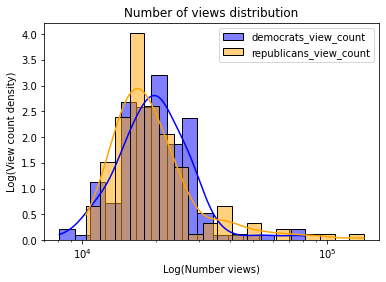

In [36]:
ax = sns.histplot(democrats.view_count.values, kde=True, stat='density', color='blue', label='democrats_view_count', log_scale=True)
ax = sns.histplot(republicans.view_count.values, kde=True, stat='density', color='orange', label='republicans_view_count', log_scale=True)
ax.set(title='Number of views distribution',xlabel='Log(Number views)', ylabel='Log(View count density)')
plt.legend()
plt.show()

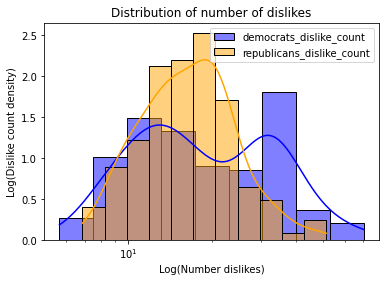

In [39]:
ax = sns.histplot(democrats['dislike_count'].values, kde=True, stat='density', color='blue', label='democrats_dislike_count', log_scale=True)
ax = sns.histplot(republicans['dislike_count'].values, kde=True, stat='density', color='orange', label='republicans_dislike_count', log_scale=True)
ax.set(title='Distribution of number of dislikes',xlabel='Log(Number dislikes)', ylabel='Log(Dislike count density)')
plt.legend()
plt.show()

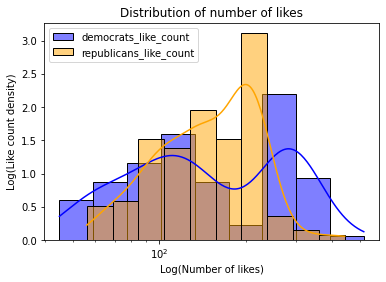

In [40]:
ax = sns.histplot(democrats['like_count'].values, kde=True, stat='density', color='blue', label='democrats_like_count', log_scale=True)
ax = sns.histplot(republicans['like_count'].values, kde=True, stat='density', color='orange', label='republicans_like_count', log_scale=True)
ax.set(title='Distribution of number of likes',xlabel='Log(Number of likes)', ylabel='Log(Like count density)')
plt.legend()
plt.show()

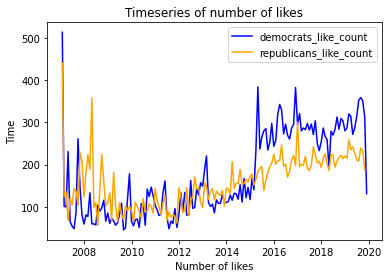

In [41]:
democrats['upload_date'] = democrats.index
republicans['upload_date'] = republicans.index
ax = sns.lineplot(x = "upload_date", y = "like_count", data=democrats, color='blue', label='democrats_like_count')
ax = sns.lineplot(x = "upload_date", y = "like_count", data=republicans,  color='orange', label='republicans_like_count')
ax.set(title='Timeseries of number of likes',xlabel='Number of likes', ylabel='Time')
plt.legend()
plt.show()

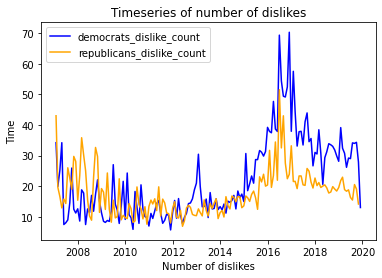

In [42]:
ax = sns.lineplot(x = "upload_date", y = "dislike_count", data=democrats, color='blue', label='democrats_dislike_count')
ax = sns.lineplot(x = "upload_date", y = "dislike_count", data=republicans,  color='orange', label='republicans_dislike_count')
ax.set(title='Timeseries of number of dislikes',xlabel='Number of dislikes', ylabel='Time')
plt.legend()
plt.show()

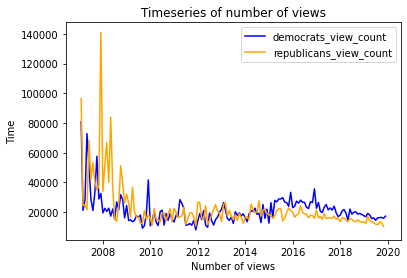

In [43]:
ax = sns.lineplot(x = "upload_date", y = "view_count", data=democrats, color='blue', label='democrats_view_count')
ax = sns.lineplot(x = "upload_date", y = "view_count", data=republicans,  color='orange', label='republicans_view_count')
ax.set(title='Timeseries of number of views',xlabel='Number of views', ylabel='Time')
plt.legend()
plt.show()